![title](./RL.png)

différence absolue : 3750.0
différence relative: 35%


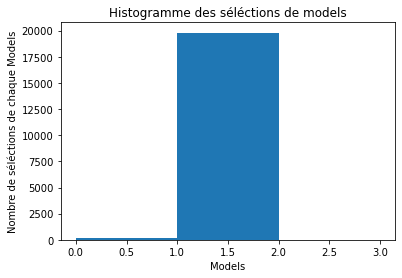

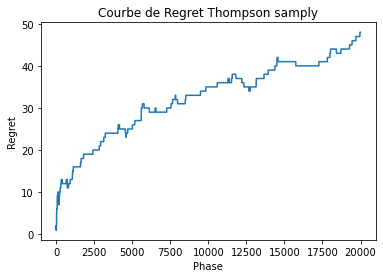

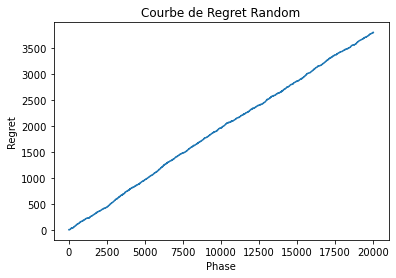

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 30 11:00:54 2021

@author: aristotemutombo
"""


import numpy as np
# Graphique :
import matplotlib.pyplot as plt
# alaétoire:
import random 


# si N = 5000 images pour tous les pays confondus lorsque n tends vers l'infini
# c'est à dire n fois 4 :
N = 20000 
d = 3 # modèles CNN,Autoencodeurs et DCGAN avec leur niveau d'accuracy(TAUX DE CONVERSION)

# CRÉATION D'UN ENVIRONNEMENT virtuelle : dans une situation réel on a pas

#[0.98,0.5313,0.97] on divise par 4 pour répresenter la proportion d'accuracy dans l'environnment

accuracy_models = [0.245,0.531,0.242] # [Autoencodeurs,CNN,DCGAN] avec GAN < DCGAN

# on va simuler les réponses en avance pour chaque images à partir de chaque modèle.

# Simulation 


X = np.zeros((N,d)) # N = nombres d'images , d = models  
for i in range(N): 
    for j in range(d):
            # ici la condition pour chaque X[i,j] est vrai  lorsqu'on choisit un nombre aléatoire < accuracy pour chaque model
            if np.random.rand() < accuracy_models[j]:
                # si on n'est dans le 0.49 cas on remplace false 0 par 1
                        X[i,j] = 1          #X[i,j] donc pour chaque image i et pour chaque modèle j 
# NB : l'algorithme de Thomsom samply n'a aucune idée de taux d'accuracy:

# Thompson Samply : ts
# RANDOM = rs

# On  choisie  un modèle alétoire entre nos modèles à chaque fois qu'un image se présente :
    # ab testing : technique 

models_selectionne_rs = [] # initialisation modèle que TS va choisir 
models_selectionne_ts = [] # initialisation  du modèle que TS va choisir 
total_recompense_rs = 0
total_recompense_ts = 0

# On va initialiser les vairiabes N1 et N0 = nombre de succes et d'echecs:
# Succès et echec : TS
nonbre_de_recompense_1 = [0]*d # on donne une recompense nulle lorsqu'on debute l'algorithme pour tout les modèles:
nonbre_de_recompense_0 = [0]*d
recompense_models = [0] * d
regret_rs = []
regret_ts = []
# Etape 1: 
for n in range(0,N):
    
    # Model Alétoire: on choisie un model aléa ensuite on l'ajoute à notre model
    
    models_rs = random.randrange(d) # il va choisir un nombre aléatoire entre 0 et 3
    models_selectionne_rs.append(models_rs)
    # on cherche la récompense :
    
    recompense_rs = X[n, models_rs ]# n image avec le model sélectionné:
    total_recompense_rs = total_recompense_rs  + recompense_rs # 
    
    # Thompson samply:
#Etape 2

    # pour chaque model dans d :
    models_ts = 0 # on prend les modèles 1 si jamais ça arrive
    max_random = 0
    for i in range(0,d):
        # on va prendre une distribution dans beta :
        random_beta = random.betavariate(nonbre_de_recompense_1[i]+1,nonbre_de_recompense_0[i] + 1 )
        # on le compare avec la valeur max_random  :
        if random_beta > max_random:
            # on met à jour les valeurs maximales
            max_random = random_beta # si la valeur de random_beta = 0.31 >0 max_random donc le nouveau maximal est 0.34
            models_ts = i

    # On doir mettre à jour étape 3 :
    
    
    recompense_ts = X[n, models_ts ]
     # Si le modèle selectionnée d(n) a réçu 1 comme recompense :
    if recompense_ts == 1: 
         # On va mettre à jour le modèle qu'on a séléctionnée pour changer les paramètres de notre lois (nonbre_de_recompense_1[i]+1,nonbre_de_recompense_0[i] + 1
         nonbre_de_recompense_1[models_ts]  += 1 
    else:
        nonbre_de_recompense_0[models_rs] += 0
        # on va enregistrer le model qu'on selectionnée
    models_selectionne_ts.append(models_ts)
    
    total_recompense_ts = total_recompense_ts + recompense_ts
        # Best Model 
    for i in range(0, d):
           recompense_models[i] = recompense_models[i] + X[n, i]
    total_recompense_bs = max(recompense_models)
    # Regret
    regret_rs.append(total_recompense_bs - total_recompense_rs)
    regret_ts.append(total_recompense_bs - total_recompense_ts)
        
    
    
# on va enregistrer le model qu'on selectionnée

# on va maintenant selectionnée la différence enttre les deux  models aléatoire et TS:
# On va calculer la différence absolue et relative :
diff_absolue = (total_recompense_ts - total_recompense_rs) # Ici on va avoir la récompense en terme de nombre  de prédiction des images  de  tous les models 
# Combien des images on va avoir :
diff_relative = (total_recompense_ts - total_recompense_rs)/total_recompense_ts*100
print("différence absolue : " + str(diff_absolue)) # grace au modèle Tsamply on a gagné 263 images de plus qui ont été correctement prédite
print("différence relative: {:.0f}%".format(diff_relative)) # 

# plus les nombres d'images augmentent plus les nombres 
# D'autres algorithme UCB beaucoup plus perfomant 


plt.hist(models_selectionne_ts, range = [0,3], bins = 3)
plt.title("Histogramme des séléctions de models")
plt.xlabel("Models")
plt.ylabel('Nombre de séléctions de chaque Models')
plt.show()


##Plot regret  TS

plt.plot(regret_ts) 
plt.title('Courbe de Regret Thompson samply') 
plt.xlabel('Phase') 
plt.ylabel('Regret') 
plt.show()

##Plot regret  rs

plt.plot(regret_rs) 
plt.title('Courbe de Regret Random') 
plt.xlabel('Phase') 
plt.ylabel('Regret') 
plt.show()



